In [1]:
import pandas as pd
query = """
  SELECT 
    name, member_id, party, state,
    congress, session, date, time, roll_call,
    vote_position, dw_nominate
  FROM `congress.votes_senate_all`
  WHERE congress=114
  """
# print query

In [5]:
# Version for non-GCP?
# from gcp_helpers import *
# from analysis_helpers import *
# df = execute_query(query)

In [8]:
# version for inside GCP
import google.datalab.bigquery as bq
df = bq.Query(query).execute().result().to_dataframe()
print "loaded", len(df), "rows."
df.head()

,name,member_id,party,state,congress,session,date,time,roll_call,vote_position,dw_nominate
0,Michael Bennet,B001267,D,CO,114,2,2016-01-12,14:31:00,2,No,-0.207
1,Richard Blumenthal,B001277,D,CT,114,2,2016-01-12,14:31:00,2,No,-0.421
2,Cory Booker,B001288,D,NJ,114,2,2016-01-12,14:31:00,2,No,-0.615
3,Barbara Boxer,B000711,D,CA,114,2,2016-01-12,14:31:00,2,No,-0.450
4,Sherrod Brown,B000944,D,OH,114,2,2016-01-12,14:31:00,2,No,-0.438


In [18]:
from analysis_helpers import *
v = generate_vote_matrix(df, sort_partisan=True)
# print pd.DataFrame(v.head())

Creating correlation matrix... calculating eigenvectors, eigenvalues... done.


/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


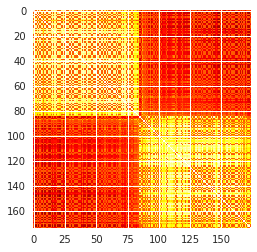

In [14]:
corr, eigenvalues, eigenvectors = analyze_votes(v)
show_corr_heat_map(corr)
# # TODO: Iterate over time! Build a better process for this...


eigenportfolio 0 gross= 1.0000000000000002 net= 0.0571972633284364


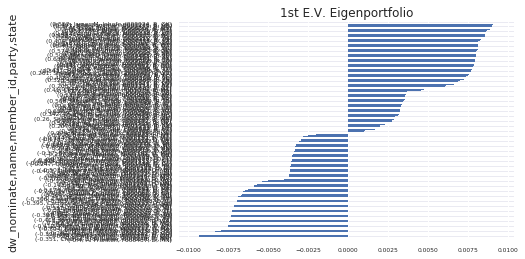

eigenportfolio 1 gross= 0.9999999999999997 net= -0.36019660334511944


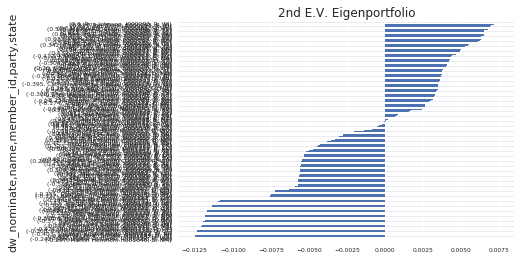

eigenportfolio 2 gross= 1.0 net= -0.9972413557612819


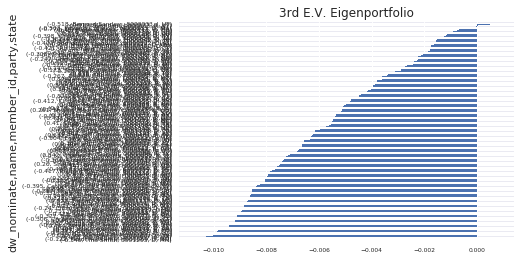

Done plotting.


Text(0.5,1,u'Density of States')

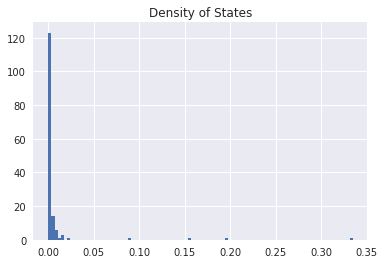

In [15]:
show_eigen_portfolio(eigen_portfolio(eigenvectors, eigenvalues, 0, v), "1st E.V. Eigenportfolio")
show_eigen_portfolio(eigen_portfolio(eigenvectors, eigenvalues, 1, v), "2nd E.V. Eigenportfolio")
show_eigen_portfolio(eigen_portfolio(eigenvectors, eigenvalues, 2, v), "3rd E.V. Eigenportfolio")
print "Done plotting."
plt.hist(filter(lambda l: l > 0.0000001, eigenvalues), bins=100)
plt.title("Density of States")